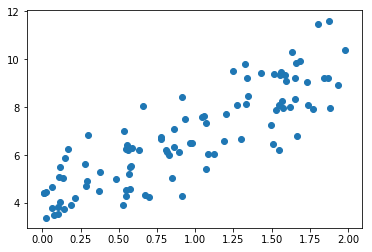

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

# Etape 1: generer les datas: 

x=2 * np.random.rand(100,1)
y=4 + 3 * x + np.random.randn(100,1)

plt.scatter(x,y)

# Generation d'Inputs

In [5]:
# Construction de la variable X en concatenant 1 
X_b=np.c_[np.ones((100,1)), x]
X_new=np.array([[0],[2]])
X_new_b=np.c_[np.ones((2,1)),X_new] # add x0=I_2

# Methode de Gradient descendant par mini lots

Au lieu de processer une seule ligne au hasard, on va plutot processer des lots choisis par hasard.

### Algo analytique:

In [6]:
# Code: 
n_epochs=50
minibatch_size=20
t0,t1=5, 50 # Hyperparameter du L.Sch
m=100
t=0

def learning_schedule(t,t0,t1):
    return t0/(t+t1)

thetas=np.random.randn(2,1) #init aleatoire

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1            
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(thetas) - yi)/minibatch_size
        learning_rate = learning_schedule(t,t0,t1) # taux d'apprentissage(m)
        thetas = thetas - learning_rate * gradients
        
thetas

array([[ 3.98194947],
       [ 2.92120892]])

### Scikit learn:

In [36]:
# le Regressor dans ce cas est: SGDRegressor:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor(max_iter=50,tol=0.00001,penalty=None,eta0=0.1) 
# n_epochs, aucune penalty contraintes, eta0 pour init.
sgd_reg.partial_fit(x,y.ravel()) # y s'attend a une list (1! dim) pas vecteur , USE of Partial_fit
sgd_reg.intercept_, sgd_reg.coef_

(array([ 3.79729875]), array([ 3.0017286]))